In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Question Q1 Bass Noise-Robust Estimation

## Part 1

In [2]:
import pandas as pd
 
df = pd.read_excel('adoptionseries2_with_noise.xlsx')
 
print(df)

     t   N(t)
0    1  0.123
1    2  0.097
2    3  0.171
3    4  0.145
4    5  0.238
5    6  0.214
6    7  0.333
7    8  0.314
8    9  0.466
9   10  0.455
10  11  0.650
11  12  0.653
12  13  0.902
13  14  0.926


In [3]:
print (df['N(t)'])

0     0.123
1     0.097
2     0.171
3     0.145
4     0.238
5     0.214
6     0.333
7     0.314
8     0.466
9     0.455
10    0.650
11    0.653
12    0.902
13    0.926
Name: N(t), dtype: float64


In [4]:
df['A'] = 0


df['A'] = df['N(t)'].cumsum()

df['A'] = df['A'].shift(fill_value=0)
df['A_square'] = df['A']*df['A']

print(df)

     t   N(t)      A   A_square
0    1  0.123  0.000   0.000000
1    2  0.097  0.123   0.015129
2    3  0.171  0.220   0.048400
3    4  0.145  0.391   0.152881
4    5  0.238  0.536   0.287296
5    6  0.214  0.774   0.599076
6    7  0.333  0.988   0.976144
7    8  0.314  1.321   1.745041
8    9  0.466  1.635   2.673225
9   10  0.455  2.101   4.414201
10  11  0.650  2.556   6.533136
11  12  0.653  3.206  10.278436
12  13  0.902  3.859  14.891881
13  14  0.926  4.761  22.667121


In [5]:
# Create a linear regression model on the train set using smf.ols
model_test = smf.ols(formula='Q("N(t)") ~ A + A_square', data=df).fit()
print(model_test.summary())

                            OLS Regression Results                            
Dep. Variable:              Q("N(t)")   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     188.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.09e-09
Time:                        10:42:13   Log-Likelihood:                 23.404
No. Observations:                  14   AIC:                            -40.81
Df Residuals:                      11   BIC:                            -38.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0961      0.027      3.611      0.0

/Users/vishwasdhanda/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:

a = model_test.params[0]
b = model_test.params[1]
c = model_test.params[2]

# Calculate the quadratic formula
p = (((b**2 - 4*a*c)**0.5)-b)/2
q = (((b**2 - 4*a*c)**0.5)+b)/2
m = -q/c

print("(p, q):", np.round(p,3), np.round(q,3))
print("m:", np.round(m,3))


(p, q): 0.003 0.214
m: 34.405


/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_41996/3570547401.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = model_test.params[0]
/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_41996/3570547401.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = model_test.params[1]
/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_41996/3570547401.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c 

In [7]:


for i in range(14, 35):
    df.loc[i, 'A'] = df.loc[i - 1, 'N(t)'] + df.loc[i - 1, 'A']
    df.loc[i, 'A_square'] = df.loc[i, 'A']**2

    X_new = pd.DataFrame({'A': [df.loc[i, 'A']], 'A_square': [df.loc[i, 'A_square']]})
    y = model_test.predict(X_new)
    df.loc[i, 'N(t)'] = y[0]
rounded_N_30 = "{:.3g}".format(df['N(t)'][29])
print(rounded_N_30)




0.974


ANS Q1 part 1 : (p, q): 0.0027924053944219374 0.21409748324219868
m: 34.40472892567297 
N(30):0.9738414756158403

## part 2

In [8]:
def bass_model(A_t, p, q):
    return 100*p + (q-p)*A_t-((q/100)* (A_t)**2)

In [9]:

# Define N(t) as the number of adopters in millions
N_t = df['N(t)'].values
A_t = df['A'].values

# Initial guess for parameters p and q
p0 = (0.01, 0.5)

# Perform curve fitting
p_opt, q_opt = curve_fit(bass_model, A_t[:14], N_t[:14],p0=p0)[0]

print("Estimated values of p and q:")
rounded_p = "{:.3g}".format(p_opt)
rounded_q = "{:.3g}".format(q_opt)

print("Rounded values of p and q:")
print("p:", rounded_p)
print("q:", rounded_q)


Estimated values of p and q:
Rounded values of p and q:
p: 0.00106
q: 0.194


Ans Q1 part 2 : 
Estimated values of p and q:
p: 0.00102
q: 0.202

## part 3 

In [10]:
p = 0.0010607266989204932
q = 0.19368439543274588
for i in range(14, 35):
    df.loc[i, 'A'] = df.loc[i - 1, 'N(t)'] + df.loc[i - 1, 'A']
    df.loc[i, 'A_square'] = df.loc[i, 'A']**2

    X_new = pd.DataFrame({'A': [df.loc[i, 'A']], 'A_square': [df.loc[i, 'A_square']]})
    y = bass_model(df.loc[i, 'A'],p,q)
    df.loc[i, 'N(t)'] = y

rounded_N_30 = "{:.3g}".format(df['N(t)'][29])
print(rounded_N_30)


4.89


Ans q1 part 3 : 
n(30): 4.89

## part 4 

In [11]:
def cont_bass_model(t, p, q):
    return (100*((1 - np.exp(-(p+q)*t))/(1 + (q/p)*np.exp(-(p+q)*t))) - 100*((1 - np.exp(-(p+q)*(t-1)))/(1 + (q/p)*np.exp(-(p+q)*(t-1)))))


In [12]:

# Define N(t) as the number of adopters in millions
N_t = df['N(t)'].values
t = df.index.values
# Initial guess for parameters p and q
p0 = (0.002, 0.2)

# Perform curve fitting
p_opt, q_opt = curve_fit(cont_bass_model, t[:14], N_t[:14],p0=p0)[0]
rounded_p = "{:.3g}".format(p_opt)
rounded_q = "{:.3g}".format(q_opt)
print("p:", p_opt)
print("Rounded values of p and q:")
print("p:", rounded_p)
print("q:", rounded_q)


p: 0.0011409961153190768
Rounded values of p and q:
p: 0.00114
q: 0.178


In [13]:
p = p_opt
q = q_opt

for i in range(14, 35):
    df.loc[i, 'A'] = df.loc[i - 1, 'N(t)'] + df.loc[i - 1, 'A']
    df.loc[i, 'A_square'] = df.loc[i, 'A']**2

    X_new = pd.DataFrame({'A': [df.loc[i, 'A']], 'A_square': [df.loc[i, 'A_square']]})
    y = bass_model(df.loc[i, 'A'],p,q)
    df.loc[i, 'N(t)'] = y
print(df['N(t)'][29])
rounded_N_30 = "{:.3g}".format(df['N(t)'][29])
print(rounded_N_30)

4.495110062051126
4.5


ANS Q1 part 4 : Estimated values of p and q:
p: 0.0011409967422434818
q: 0.17837287298707108

N(30):4.495109 

# Question 2 


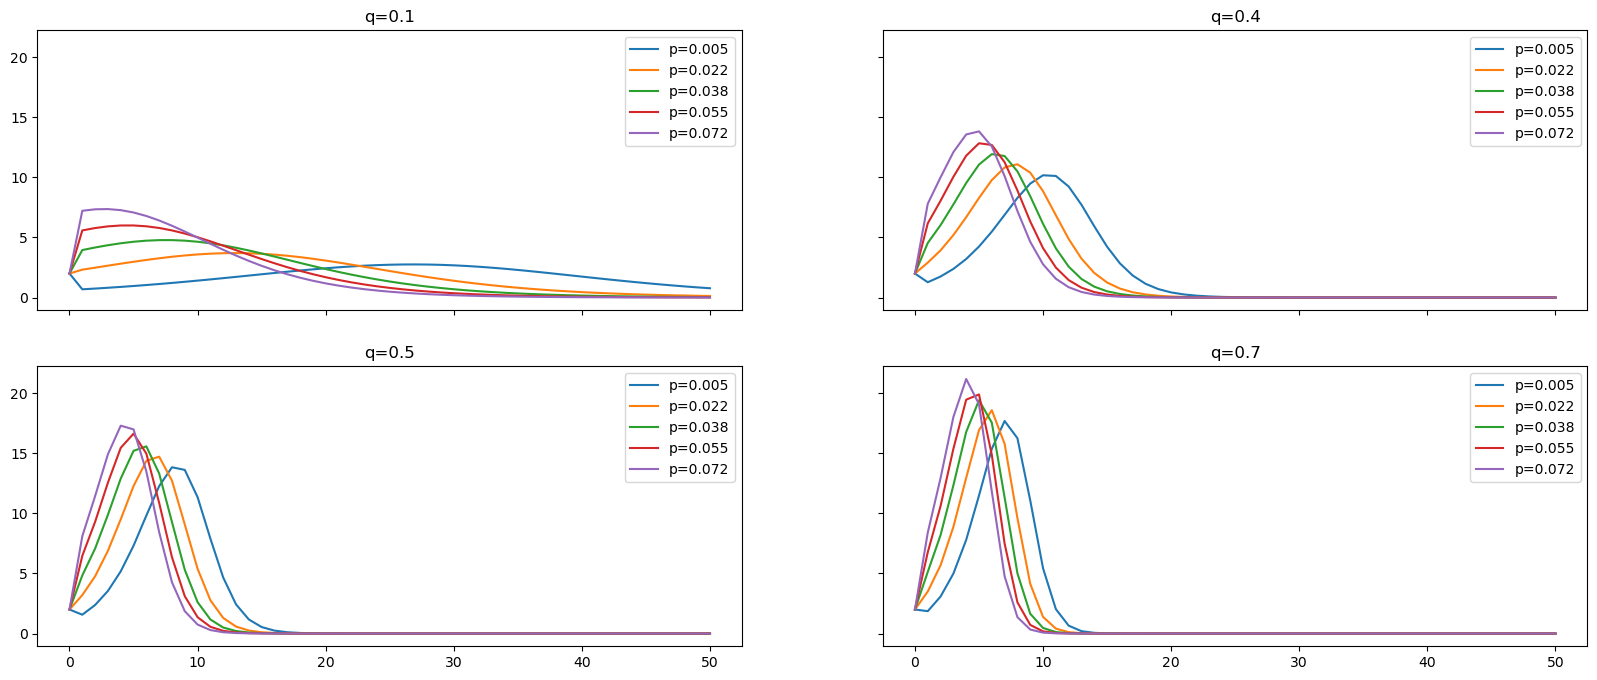

In [14]:
# Set model parameters
M = 100
T = 50
p_values = np.linspace(0.005, 0.08, 10)
q_values = np.linspace(0.1, 0.7, 5)

# Initialize arrays to store A(t) and N(t) values
N_values = np.zeros((len(p_values), len(q_values), T+1))
A_values = np.zeros((len(p_values), len(q_values), T+1))

# Loop over p and q values and compute N(t) values
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        N = np.zeros(T+1)
        A = np.zeros(T+1)
        N[0] = M * 0.02  # initial number of adopters
        A[0] = 0
        for t in range(1, T+1):
            A[t] = A[t-1] + N[t-1]
            N[t] = M * p + (q - p) * A[t] + (-q / M) * A[t] ** 2
        A_values[i,j,:] = A
        N_values[i,j,:] = N

# Plot N(t) curves for selected p and q values
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8), sharex=True, sharey=True)
for ax, (i, j) in zip(axs.flat, [(3, 0), (0, 2), (4, 3), (4,4)]):
    ax.set_title(f"q={q_values[j]:.1f}")
    for k in range(0, len(p_values), 2):
        ax.plot(N_values[k,j,:], label=f"p={p_values[k]:.3f}")
    ax.legend()
plt.show()


Changing p with q constant:

Increasing p leads to an increase in the height of the curve.
The curve reaches its maximum earlier compared to lower values of p.
The decay of the curve after reaching its peak is faster with higher values of p.

Keeping p constant and changing q:

Changing q while keeping p constant results in a major change in the shape of the curve.
Higher values of q lead to a narrower curve.
The peak of the curve is higher and reached faster with higher values of q.
The decay after reaching the peak is also faster with higher values of q.

These observations suggest that p and q influence different aspects of the diffusion process. Higher p values seem to affect the overall height and decay rate of the curve, while higher q values affect the shape and peak characteristics.

# question 3

/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_42053/1981930180.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = model_test.params[0]
/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_42053/1981930180.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = model_test.params[1]
/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_42053/1981930180.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

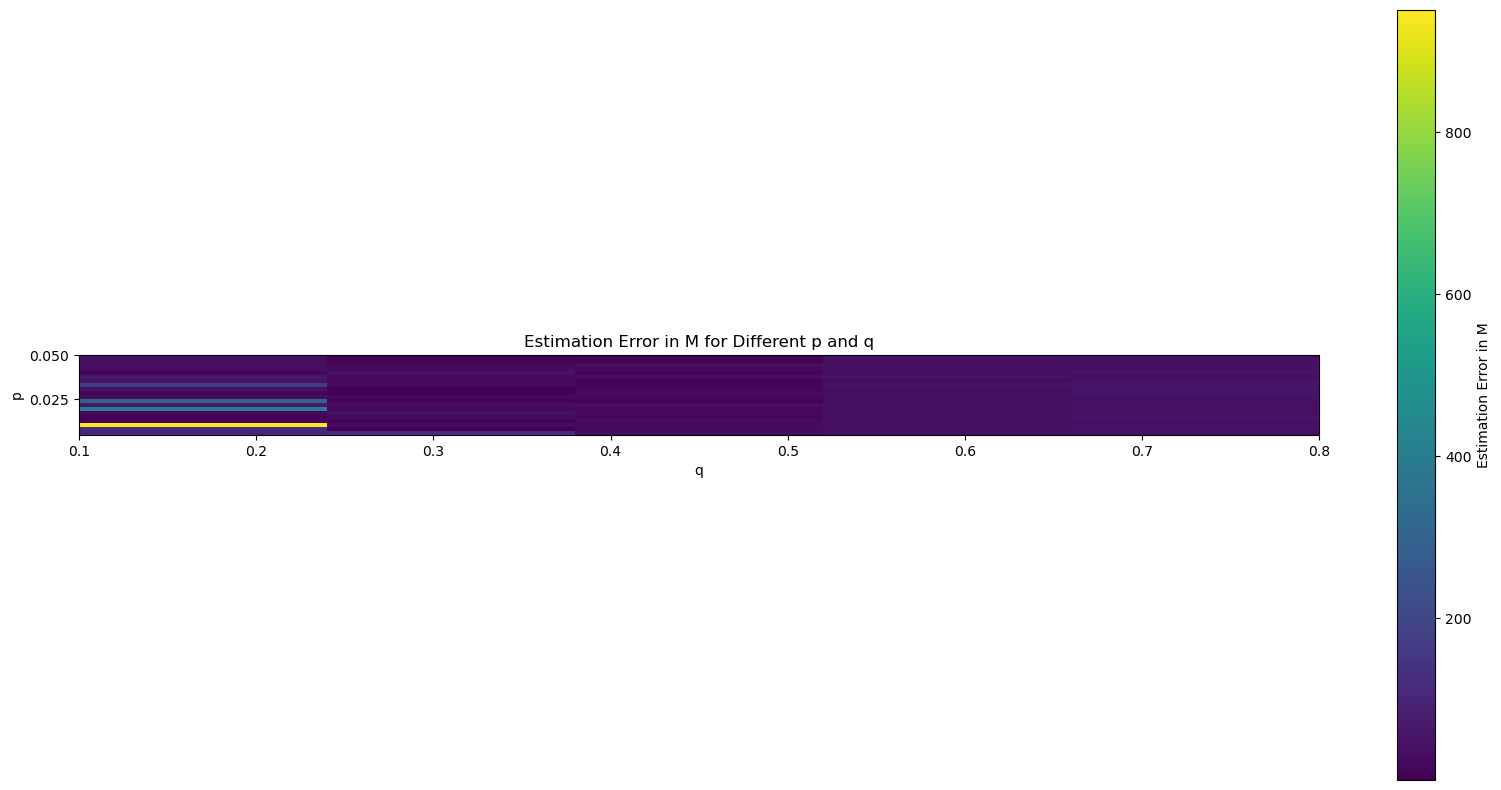

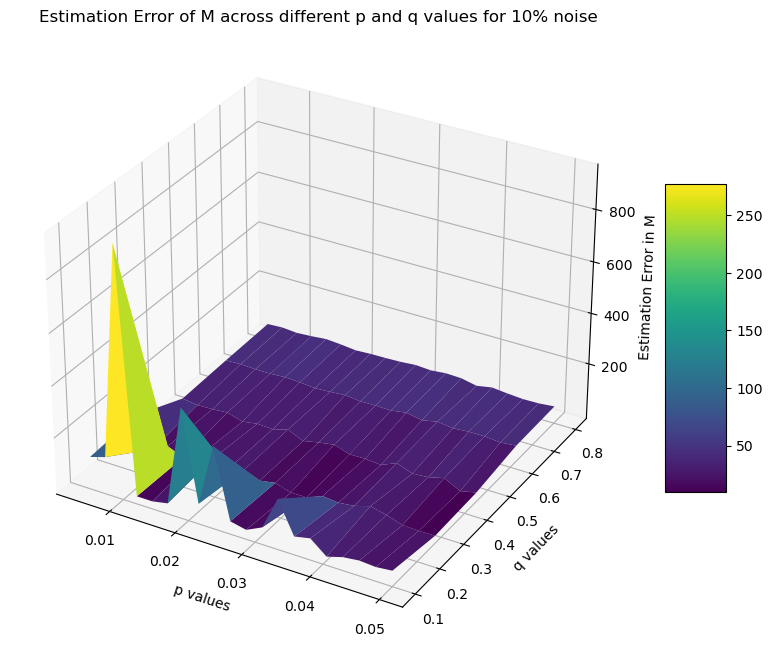

In [7]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Set model parameters
M = 100
T_max = 50
p_values = np.linspace(0.005, 0.05, 20)
q_values = np.linspace(0.1, 0.8, 5)
noise_level = 0.1  # 10% noise

# Initialize arrays to store estimation errors
estimation_errors = np.zeros((len(p_values), len(q_values)))

# Loop over p and q values
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        # Generate true N(t) values
        true_N_values = np.zeros(T_max + 1)
        A = np.zeros(T_max + 1)
        A[0] = 0
        true_N_values[0] = M * 0.02
        for t in range(1, T_max + 1):
            A[t] = A[t - 1] + true_N_values[t - 1]
            true_N_values[t] = M * p + (q - p) * A[t] - (q / M) * A[t] ** 2
        
        # Add noise to observed data
        observed_N_values = true_N_values.copy()
        observed_N_values[:15] *= np.random.uniform(0.9, 1.1, size=15)  # Adding noise
        
        # Create DataFrame
        df = pd.DataFrame({'N(t)': observed_N_values[1:], 'A': observed_N_values[:-1], 'A_square': observed_N_values[:-1] ** 2})
        
        # Create a linear regression model
        model_test = smf.ols(formula='Q("N(t)") ~ A + A_square', data=df).fit()
        
        # Extract coefficients from the model
        a = model_test.params[0]
        b = model_test.params[1]
        c = model_test.params[2]

        # Calculate the quadratic formula
        p_est = (((b**2 - 4*a*c)**0.5) - b) / 2
        q_est = (((b**2 - 4*a*c)**0.5) + b) / 2
        M_est = -q_est / c

        # Compute estimation error in M
        estimation_errors[i, j] = np.abs(M_est - M)

plt.figure(figsize=(20, 10))
plt.imshow(estimation_errors, cmap='viridis', origin='lower', extent=[q_values[0], q_values[-1], p_values[0], p_values[-1]])
plt.colorbar(label='Estimation Error in M')
plt.xlabel('q')
plt.ylabel('p')
plt.title('Estimation Error in M for Different p and q')
plt.show()
import matplotlib.pyplot as plt
# Plotting the estimation errors
p_grid, q_grid = np.meshgrid(p_values, q_values, indexing='ij')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(p_grid, q_grid, estimation_errors, cmap='viridis')
ax.set_xlabel('p values')
ax.set_ylabel('q values')
ax.set_zlabel('Estimation Error in M')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Estimation Error of M across different p and q values for 10% noise')
plt.show()


/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_42053/1727717403.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = model_test.params[0]
/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_42053/1727717403.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = model_test.params[1]
/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_42053/1727717403.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

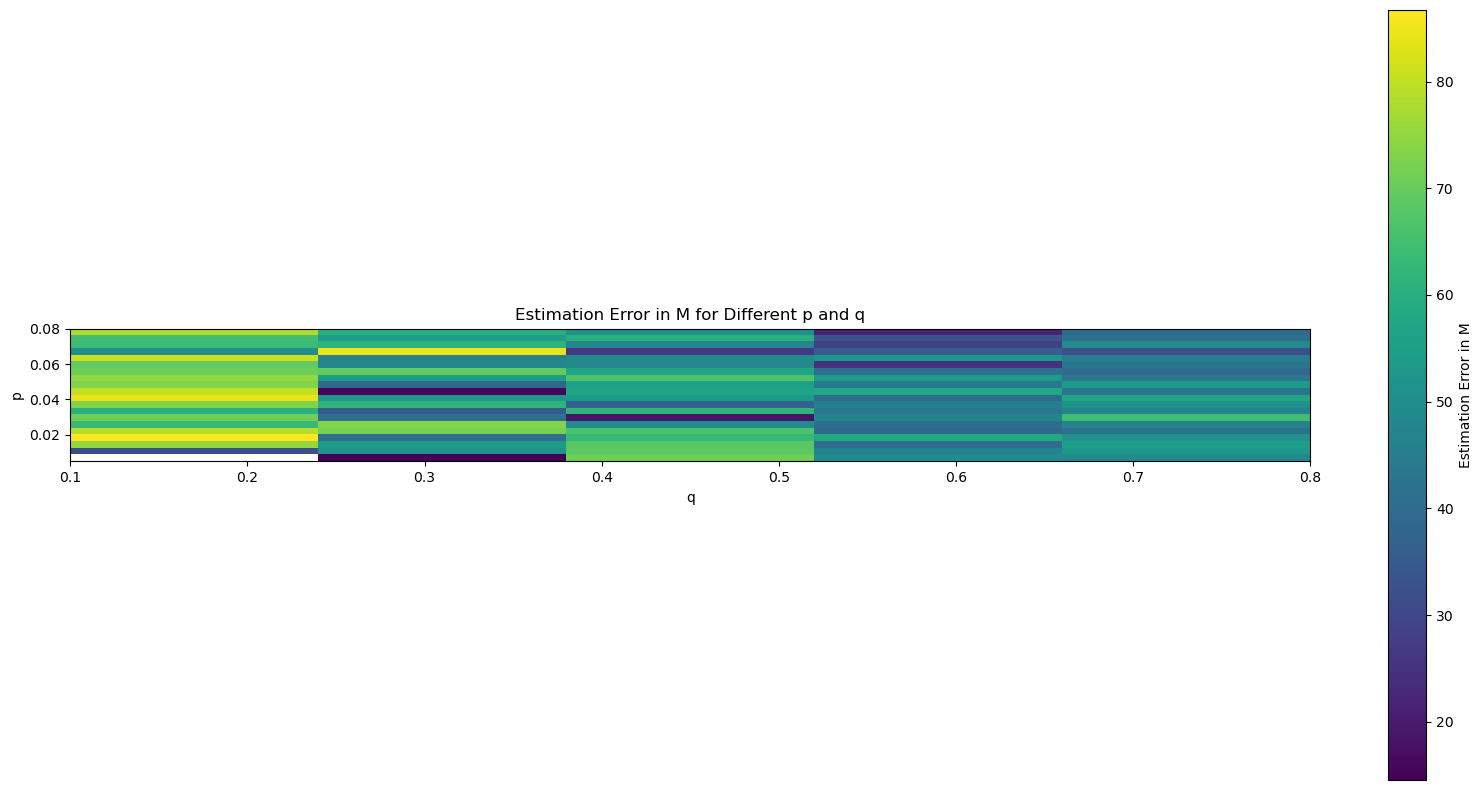

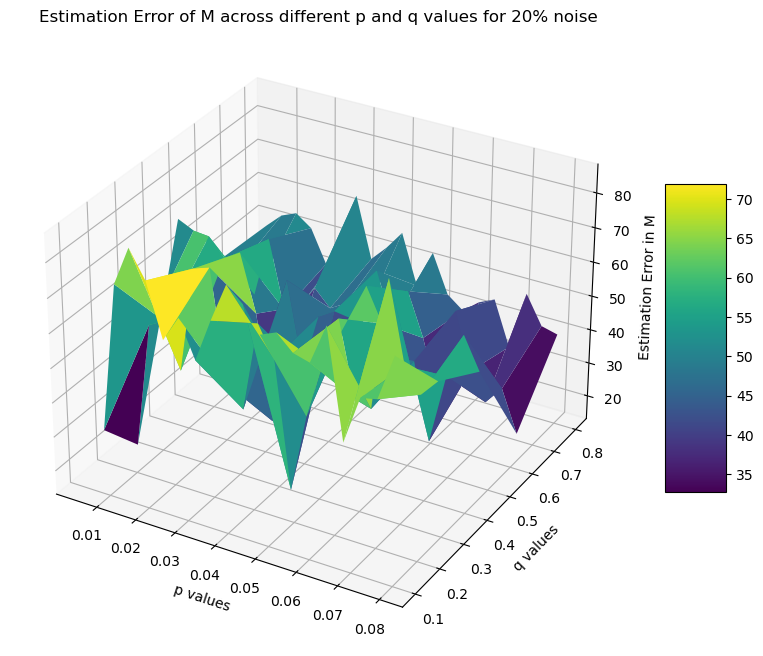

In [6]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Set model parameters
M = 100
T_max = 50
p_values = np.linspace(0.005, 0.08, 20)
q_values = np.linspace(0.1, 0.8, 5)
noise_level = 0.2  # 20% noise

# Initialize arrays to store estimation errors
estimation_errors = np.zeros((len(p_values), len(q_values)))

# Loop over p and q values
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        # Generate true N(t) values
        true_N_values = np.zeros(T_max + 1)
        A = np.zeros(T_max + 1)
        A[0] = 0
        true_N_values[0] = M * 0.02
        for t in range(1, T_max + 1):
            A[t] = A[t - 1] + true_N_values[t - 1]
            true_N_values[t] = M * p + (q - p) * A[t] - (q / M) * A[t] ** 2
        
        # Add noise to observed data
        observed_N_values = true_N_values.copy()
        observed_N_values[:15] *= np.random.uniform(0.8, 1.2, size=15)  # Adding noise
        
        # Create DataFrame
        df = pd.DataFrame({'N(t)': observed_N_values[1:], 'A': observed_N_values[:-1], 'A_square': observed_N_values[:-1] ** 2})
        
        # Create a linear regression model
        model_test = smf.ols(formula='Q("N(t)") ~ A + A_square', data=df).fit()
        
        # Extract coefficients from the model
        a = model_test.params[0]
        b = model_test.params[1]
        c = model_test.params[2]

        # Calculate the quadratic formula
        p_est = (((b**2 - 4*a*c)**0.5) - b) / 2
        q_est = (((b**2 - 4*a*c)**0.5) + b) / 2
        M_est = -q_est / c

        # Compute estimation error in M
        estimation_errors[i, j] = np.abs(M_est - M)

plt.figure(figsize=(20, 10))
plt.imshow(estimation_errors, cmap='viridis', origin='lower', extent=[q_values[0], q_values[-1], p_values[0], p_values[-1]])
plt.colorbar(label='Estimation Error in M')
plt.xlabel('q')
plt.ylabel('p')
plt.title('Estimation Error in M for Different p and q')
plt.show()
import matplotlib.pyplot as plt
# Plotting the estimation errors
p_grid, q_grid = np.meshgrid(p_values, q_values, indexing='ij')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(p_grid, q_grid, estimation_errors, cmap='viridis')
ax.set_xlabel('p values')
ax.set_ylabel('q values')
ax.set_zlabel('Estimation Error in M')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Estimation Error of M across different p and q values for 20% noise')
plt.show()


/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_41935/1424916228.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = model_test.params[0]
/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_41935/1424916228.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = model_test.params[1]
/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_41935/1424916228.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

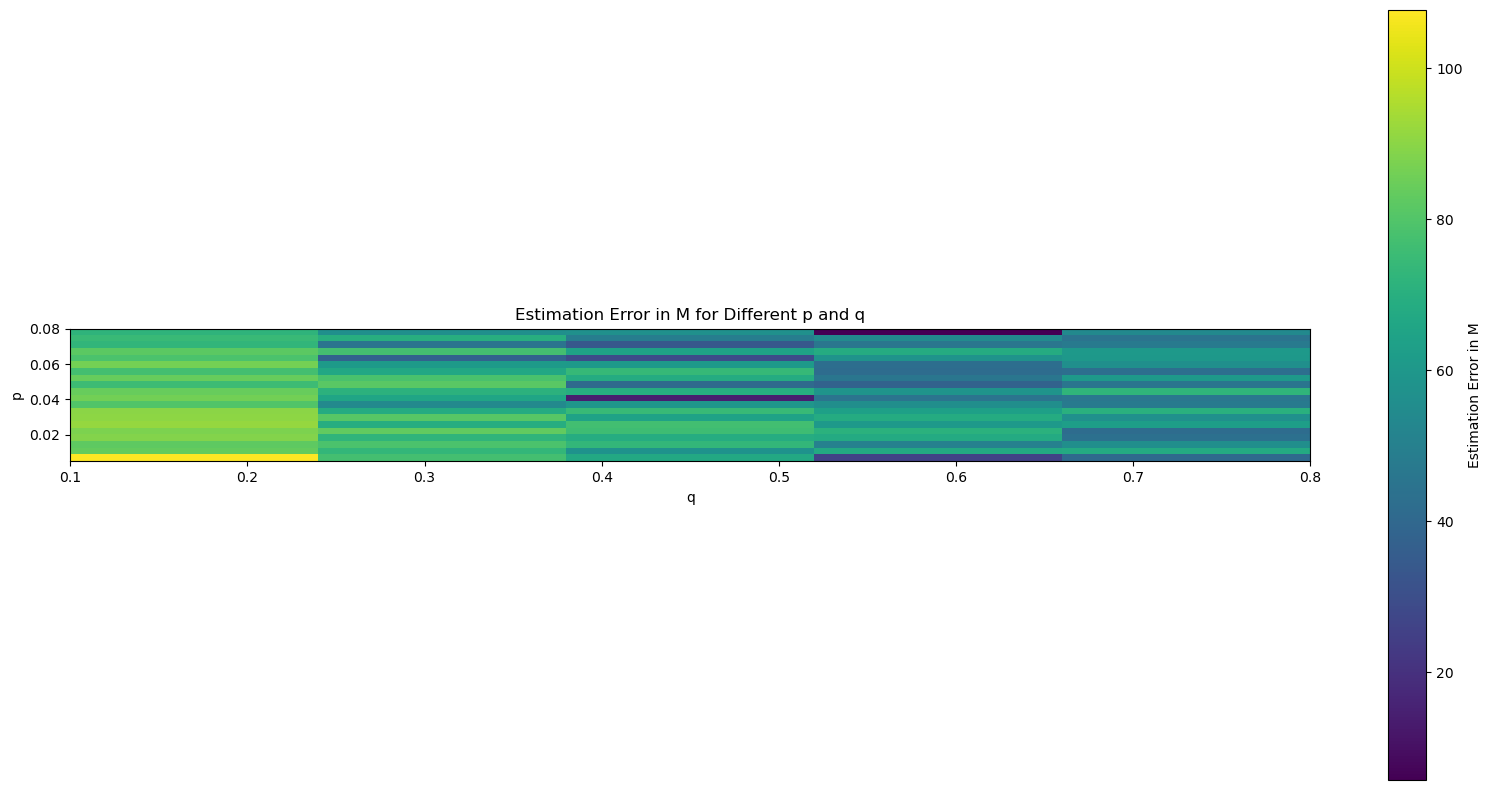

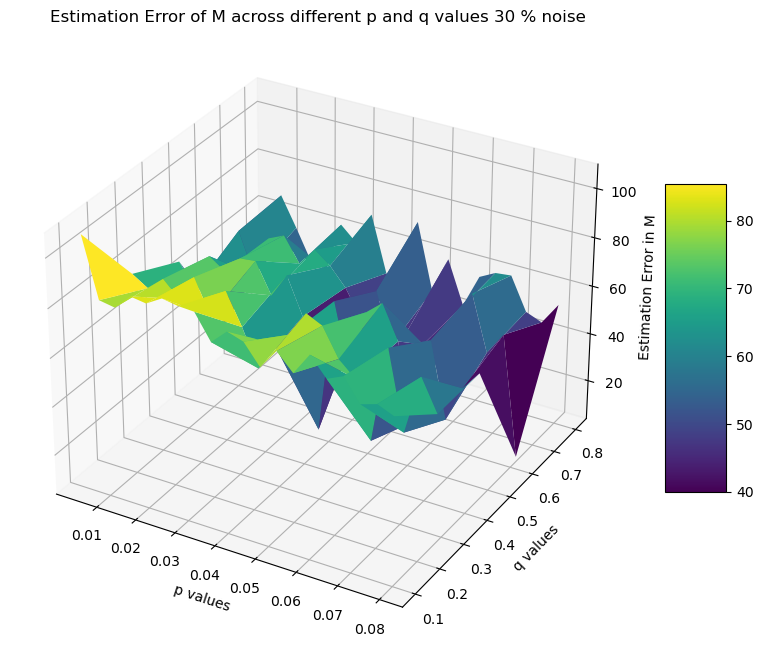

In [30]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Set model parameters
M = 100
T_max = 50
p_values = np.linspace(0.005, 0.08, 20)
q_values = np.linspace(0.1, 0.8, 5)
noise_level = 0.3  # 30% noise

# Initialize arrays to store estimation errors
estimation_errors = np.zeros((len(p_values), len(q_values)))

# Loop over p and q values
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        # Generate true N(t) values
        true_N_values = np.zeros(T_max + 1)
        A = np.zeros(T_max + 1)
        A[0] = 0
        true_N_values[0] = M * 0.02
        for t in range(1, T_max + 1):
            A[t] = A[t - 1] + true_N_values[t - 1]
            true_N_values[t] = M * p + (q - p) * A[t] - (q / M) * A[t] ** 2
        
        # Add noise to observed data
        observed_N_values = true_N_values.copy()
        observed_N_values[:15] *= np.random.uniform(0.7, 1.3, size=15)  # Adding noise
        
        # Create DataFrame
        df = pd.DataFrame({'N(t)': observed_N_values[1:], 'A': observed_N_values[:-1], 'A_square': observed_N_values[:-1] ** 2})
        
        # Create a linear regression model
        model_test = smf.ols(formula='Q("N(t)") ~ A + A_square', data=df).fit()
        
        # Extract coefficients from the model
        a = model_test.params[0]
        b = model_test.params[1]
        c = model_test.params[2]

        # Calculate the quadratic formula
        p_est = (((b**2 - 4*a*c)**0.5) - b) / 2
        q_est = (((b**2 - 4*a*c)**0.5) + b) / 2
        M_est = -q_est / c

        # Compute estimation error in M
        estimation_errors[i, j] = np.abs(M_est - M)

plt.figure(figsize=(20, 10))
plt.imshow(estimation_errors, cmap='viridis', origin='lower', extent=[q_values[0], q_values[-1], p_values[0], p_values[-1]])
plt.colorbar(label='Estimation Error in M')
plt.xlabel('q')
plt.ylabel('p')
plt.title('Estimation Error in M for Different p and q')
plt.show()
import matplotlib.pyplot as plt
# Plotting the estimation errors
p_grid, q_grid = np.meshgrid(p_values, q_values, indexing='ij')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(p_grid, q_grid, estimation_errors, cmap='viridis')
ax.set_xlabel('p values')
ax.set_ylabel('q values')
ax.set_zlabel('Estimation Error in M')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Estimation Error of M across different p and q values 30 % noise')
plt.show()


# question 4


In [205]:
import statsmodels.api as sm
df = pd.read_excel('adoptionseries2_with_noise.xlsx')
df['A'] = 0


df['A'] = df['N(t)'].cumsum()

df['A'] = df['A'].shift(fill_value=0)

df['R'] = 100 - df['A']
df['n/r'] = df['N(t)']/df['R']

df['A'] /=100



# Create a linear regression model on the train set using smf.ols
model = smf.ols(formula='Q("n/r") ~ A ', data=df).fit()
print(model.summary())
# Extract coefficients
beta_0 = model.params[0]
beta_1 = model.params[1]


# Retrieve p and q values
M = 100  # Assuming M is fixed
p = beta_0 
q = beta_1 

print("Estimated values of p and q:")
print("p:", beta_0)
print("q:", q)

rounded_p = "{:.3g}".format(p)
rounded_q = "{:.3g}".format(q)

print("Rounded values of p and q:")
print("p:", rounded_p)
print("q:", rounded_q)

                            OLS Regression Results                            
Dep. Variable:               Q("n/r")   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     417.9
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.08e-10
Time:                        08:59:53   Log-Likelihood:                 87.302
No. Observations:                  14   AIC:                            -170.6
Df Residuals:                      12   BIC:                            -169.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011      0.000      5.201      0.0

/Users/vishwasdhanda/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_19249/2720783407.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_0 = model.params[0]
/var/folders/wy/8kwsbyw91jx0tj5vq6nkcytw0000gn/T/ipykernel_19249/2720783407.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_1 = model.params[1]
